# Import packages

In [1]:
#Import packages
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# Load data set


In [2]:
cd C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset

C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4241-80C5

 Directory of C:\Users\Radi Radev\Documents\TU Wien Master\Data Science\ML\Bike-Sharing-Dataset

18.11.2019 ?.  17:54    <DIR>          .
18.11.2019 ?.  17:54    <DIR>          ..
20.12.2013 ?.  12:10            57ÿ569 day.csv
20.12.2013 ?.  12:10         1ÿ156ÿ736 hour.csv
20.12.2013 ?.  13:29             5ÿ607 Readme.txt
               3 File(s)      1ÿ219ÿ912 bytes
               2 Dir(s)  211ÿ479ÿ830ÿ528 bytes free


In [4]:
data = pd.read_csv("hour.csv")


# Data attribute exploration

In [5]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.tail(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17359,17360,2012-12-31,1,1,12,4,0,1,1,1,0.14,0.1667,0.69,0.1045,0,3,3
17360,17361,2012-12-31,1,1,12,5,0,1,1,1,0.16,0.1515,0.64,0.1940,0,9,9
17361,17362,2012-12-31,1,1,12,6,0,1,1,1,0.16,0.1667,0.64,0.1642,0,40,40
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
17363,17364,2012-12-31,1,1,12,8,0,1,1,1,0.14,0.1515,0.69,0.1343,9,187,196
17364,17365,2012-12-31,1,1,12,9,0,1,1,2,0.18,0.2121,0.64,0.1045,13,144,157
17365,17366,2012-12-31,1,1,12,10,0,1,1,2,0.20,0.2121,0.69,0.1343,33,87,120
17366,17367,2012-12-31,1,1,12,11,0,1,1,2,0.22,0.2273,0.60,0.1940,43,114,157
17367,17368,2012-12-31,1,1,12,12,0,1,1,2,0.24,0.2273,0.56,0.1940,52,172,224
17368,17369,2012-12-31,1,1,12,13,0,1,1,2,0.26,0.2576,0.44,0.1642,38,165,203


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
data.mean()

instant       8690.000000
season           2.501640
yr               0.502561
mnth             6.537775
hr              11.546752
holiday          0.028770
weekday          3.003683
workingday       0.682721
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
cnt            189.463088
dtype: float64

##### Explore dependent variable 'cnt' - total count of bike rentals

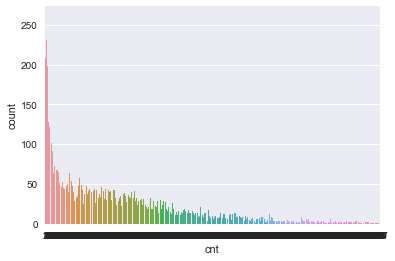

In [11]:
sns.countplot(data['cnt'])

In [12]:
data['cnt'].mean()

189.46308763450142

In [13]:
data['cnt'].value_counts()

5      260
6      236
4      231
3      224
2      208
7      198
8      182
1      158
10     155
11     147
9      128
12     122
13     113
16     105
17     102
14      97
20      91
21      90
26      90
15      89
28      85
23      81
18      79
24      76
31      75
25      72
27      71
19      69
32      68
36      67
      ... 
754      1
977      1
913      1
897      1
865      1
849      1
708      1
804      1
792      1
948      1
728      1
696      1
967      1
863      1
871      1
775      1
727      1
870      1
854      1
806      1
774      1
758      1
630      1
917      1
901      1
725      1
709      1
661      1
629      1
887      1
Name: cnt, dtype: int64

##### Explore relations between the variables

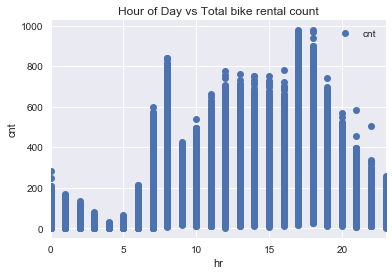

In [14]:
data.plot(x='hr', y='cnt', style='o')
plt.title('Hour of Day vs Total bike rental count')
plt.xlabel('hr')
plt.ylabel('cnt')
plt.show()

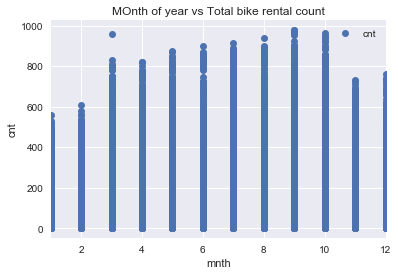

In [15]:
data.plot(x='mnth', y='cnt', style='o')
plt.title('MOnth of year vs Total bike rental count')
plt.xlabel('mnth')
plt.ylabel('cnt')
plt.show()

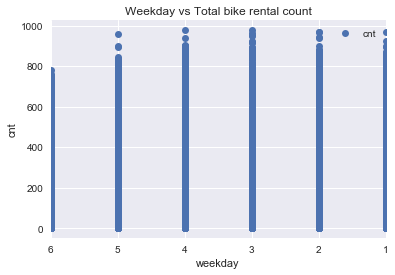

In [16]:
data.plot(x='weekday', y='cnt', style='o')
plt.title('Weekday vs Total bike rental count')
plt.xlabel('weekday')
plt.ylabel('cnt')
plt.show()

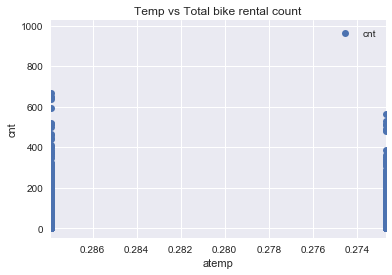

In [17]:
data.plot(x='atemp', y='cnt', style='o')
plt.title('Temp vs Total bike rental count')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

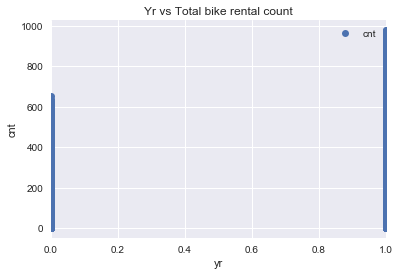

In [18]:
data.plot(x='yr', y='cnt', style='o')
plt.title('Yr vs Total bike rental count')
plt.xlabel('yr')
plt.ylabel('cnt')
plt.show()

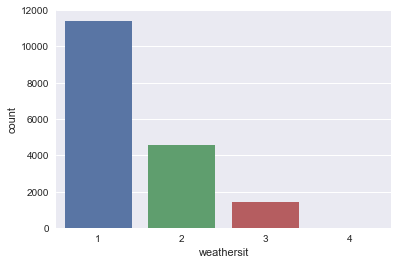

In [19]:
sns.countplot(data['weathersit'])

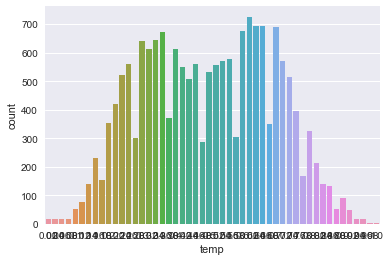

In [20]:
sns.countplot(data['temp'])

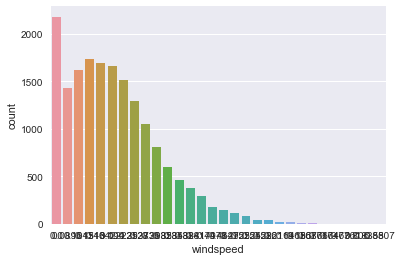

In [21]:
sns.countplot(data['windspeed'])

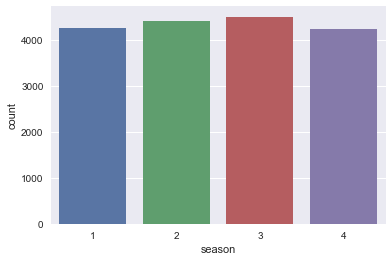

In [22]:
sns.countplot(data['season'])

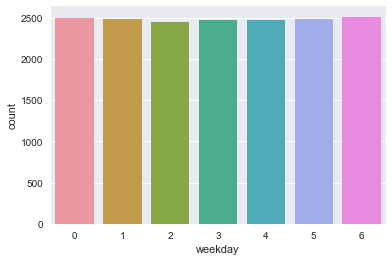

In [23]:
sns.countplot(data['weekday'])

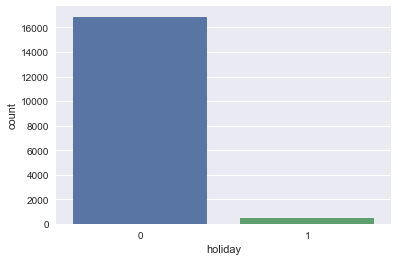

In [24]:
sns.countplot(data['holiday'])

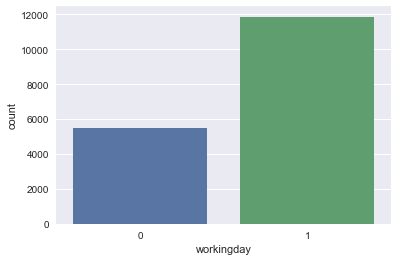

In [25]:
sns.countplot(data['workingday'])

##### Linear Regression Plot Temperature and Number of rentals

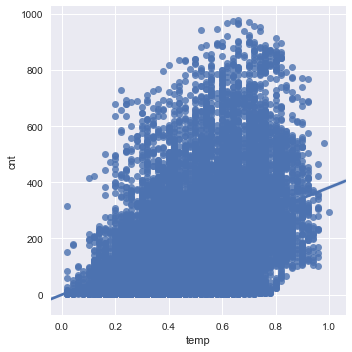

In [26]:

sns.lmplot(x="temp", y="cnt", data=data);

##### Time of day vs number of rentals regression plot

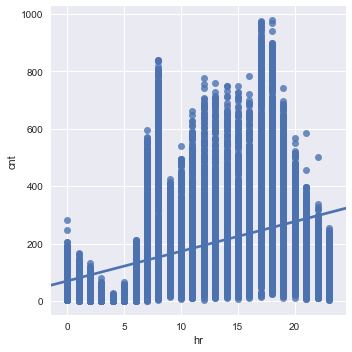

In [27]:
sns.lmplot(x="hr", y="cnt", data=data);

##### Weather Situation vs number of rentals regression plot

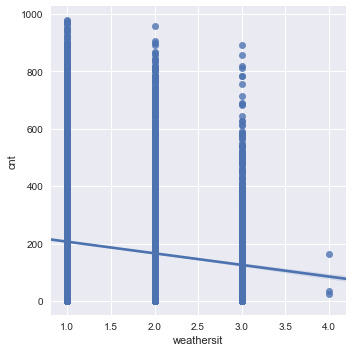

In [28]:
sns.lmplot(x="weathersit", y="cnt", data=data);

In [29]:
#bins = (1,30.0,887)
#group_names = ['low', 'high']
#data['cnt'] = pd.cut(data['cnt'], bins = bins, labels = group_names)
#data['cnt'].unique()

##### Heatmap Feature selection

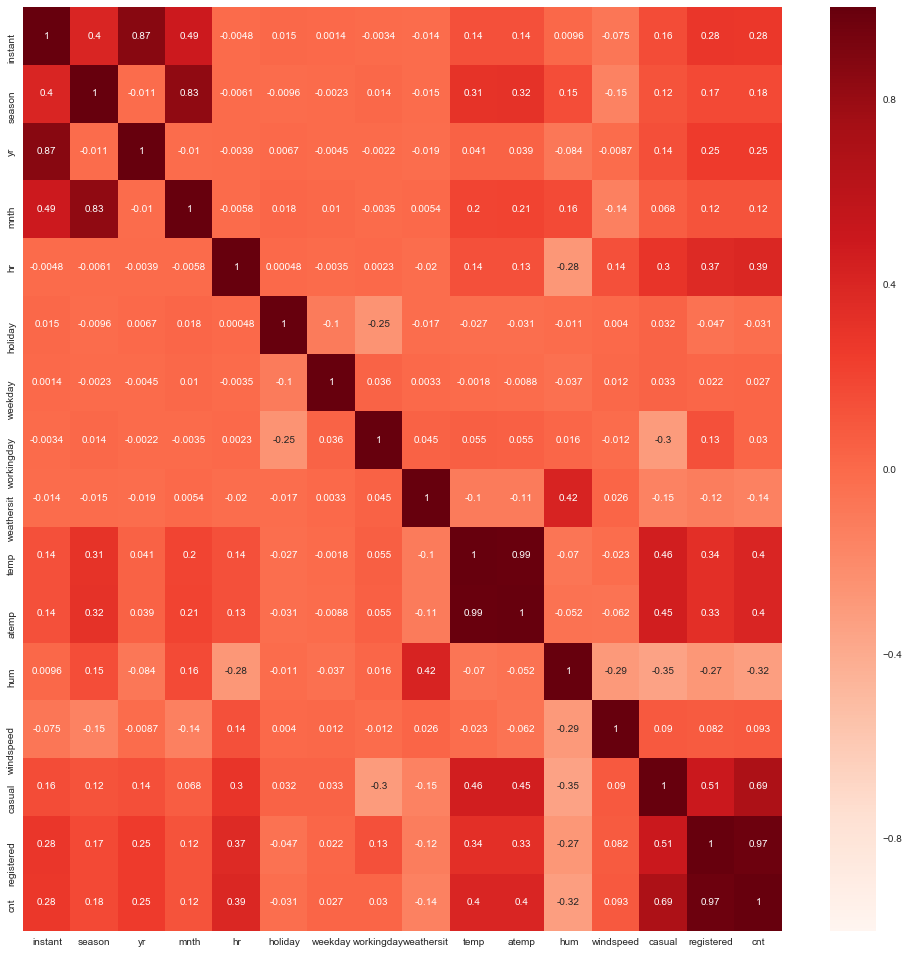

In [30]:

plt.figure(figsize=(17,17))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
cor_target = abs(cor['cnt'])

In [32]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [33]:
relevant_features = cor_target[cor_target> 0.3]
relevant_features

hr            0.394071
temp          0.404772
atemp         0.400929
hum           0.322911
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [34]:
print(data[['casual','registered']].corr())


              casual  registered
casual      1.000000    0.506618
registered  0.506618    1.000000


In [35]:
print(data[['atemp','temp']].corr())

          atemp      temp
atemp  1.000000  0.987672
temp   0.987672  1.000000


In [36]:
print(data[['hum','temp', 'hr']].corr())

           hum      temp        hr
hum   1.000000 -0.069881 -0.276498
temp -0.069881  1.000000  0.137603
hr   -0.276498  0.137603  1.000000


##### Deal with Time 

simply dont deal with time!

In [37]:
#datetime.date('dteday',[]).strftime('%V')

##### Trim the data set of unwanted variables

From above we see that cnt is strongly corelated to casual and registered, so we can drop casual and registered.
Temp and atemp are also both strongly corelated, so we can use only temp.

In [38]:
data.loc[1400]

instant             1401
dteday        2011-03-03
season                 1
yr                     0
mnth                   3
hr                    15
holiday                0
weekday                4
workingday             1
weathersit             1
temp                0.24
atemp             0.2879
hum                 0.23
windspeed              0
casual                 6
registered            62
cnt                   68
Name: 1400, dtype: object

In [39]:
#trim
X=data.drop(['instant','dteday','yr','atemp','casual','registered','cnt'], axis=1)
y=data['cnt']

In [40]:
X.loc[1400]

season         1.00
mnth           3.00
hr            15.00
holiday        0.00
weekday        4.00
workingday     1.00
weathersit     1.00
temp           0.24
hum            0.23
windspeed      0.00
Name: 1400, dtype: float64

In [41]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

One Hot encoding of categorical attributes required!!
- season
- mnth
- hr
- weekday
- weathersit

In [42]:
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,4,6]) 
X = onehotencoder.fit_transform(X).toarray()


Train and test split

In [43]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [44]:
X_train.shape, X_test.shape, data.shape

((13034, 56), (4345, 56), (17379, 17))

In [45]:
#scaling
sc = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##### Model list 

In [46]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
names = []

In [47]:
def performTimeSeriesCV(X_train_scaled, y_train_scaled, number_folds, algorithm, parameters):
    """
    Given X_train and y_train (the test set is excluded from the Cross Validation),
    number of folds, the ML algorithm to implement and the parameters to test,
    the function acts based on the following logic: it splits X_train and y_train in a
    number of folds equal to number_folds. Then train on one fold and tests accuracy
    on the consecutive as follows:
    - Train on fold 1, test on 2
    - Train on fold 1-2, test on 3
    - Train on fold 1-2-3, test on 4
    ....
    Returns mean of test accuracies.
    """

    print 'Parameters --------------------------------> ', parameters
    print 'Size train set: ', X_train_scaled.shape
    
    # k is the size of each fold. It is computed dividing the number of 
    # rows in X_train by number_folds. This number is floored and coerced to int
    k = int(np.floor(float(X_train_scaled.shape[0]) / number_folds))
    print 'Size of each fold: ', k
    
    # initialize to zero the accuracies array. It is important to stress that
    # in the CV of Time Series if I have n folds I test n-1 folds as the first
    # one is always needed to train
    accuracies = np.zeros(folds-1)

    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print ''
        
        # the split is the percentage at which to split the folds into train
        # and test. For example when i = 2 we are taking the first 2 folds out 
        # of the total available. In this specific case we have to split the
        # two of them in half (train on the first, test on the second), 
        # so split = 1/2 = 0.5 = 50%. When i = 3 we are taking the first 3 folds 
        # out of the total available, meaning that we have to split the three of them
        # in two at split = 2/3 = 0.66 = 66% (train on the first 2 and test on the
        # following)
        split = float(i-1)/i
        
        # example with i = 4 (first 4 folds):
        #      Splitting the first       4        chunks at          3      /        4
        print 'Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) 
        
        # as we loop over the folds X and y are updated and increase in size.
        # This is the data that is going to be split and it increases in size 
        # in the loop as we account for more folds. If k = 300, with i starting from 2
        # the result is the following in the loop
        # i = 2
        # X = X_train[:(600)]
        # y = y_train[:(600)]
        #
        # i = 3
        # X = X_train[:(900)]
        # y = y_train[:(900)]
        # .... 
        X = X_train_scaled[:(k*i)]
        y = y_train_scaled[:(k*i)]
        print 'Size of train + test: ', X.shape # the size of the dataframe is going to be k*i

        # X and y contain both the folds to train and the fold to test.
        # index is the integer telling us where to split, according to the
        # split percentage we have set above
        index = int(np.floor(X.shape[0] * split))
        
        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]
        
        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]
        
        # i starts from 2 so the zeroth element in accuracies array is i-2. performClassification() is a function which takes care of a classification problem. This is only an example and you can replace this function with whatever ML approach you need.
        accuracies[i-2] = performClassification(X_trainFolds, y_trainFolds, X_testFolds, y_testFolds, algorithm, parameters)
        
        # example with i = 4:
        #      Accuracy on fold         4     :    0.85423
        print 'Accuracy on fold ' + str(i) + ': ', acc[i-2]
    
    # the function returns the mean of the accuracy on the n-1 folds    
    return accuracies.mean()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-47-ebd3bb49b1b4>, line 15)

K-fold cross validation

In [48]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=2)
    results = model_selection.cross_val_score(model,X_train_scaled,y_train, cv= kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(results).mean())
    print(msg)

LinearRegression: 79.655665
DecisionTree: 61.760334
RandomForest: 49.844432
GradienBoost: 66.522643
Ridge: 79.654371
Lasso: 79.517253


In [51]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [52]:
mean_absolute_error(y_pred,y_test)

50.212309167625619

In [53]:
def get_mae(n_estimator, training_data, test_data, target_training, target_test):
    
    #fitting model with new estimator and training sets
    # fitting model with different input nodes
    model = RandomForestRegressor(n_estimators=n_estimator, random_state=0)
    # fitting the model with the training datasets
    model.fit(training_data, target_training)

    #prediction with new estiamted model
    # making prediction with the test dataset
    prediction_val = model.predict(test_data)

    # return results for MAE for the new estimator turning
    mae = mean_absolute_error(target_test, prediction_val)
    return(mae)

In [59]:
mae_plot = {}
for estimator in range(1,60):
    mae = get_mae(estimator,X_train_scaled,X_test_scaled,y_train,y_test)
    mae_plot[estimator] = mae

mae_plot

{1: 68.49021864211737,
 2: 59.614088991177603,
 3: 56.808006648766145,
 4: 54.745475642500956,
 5: 53.60455082470272,
 6: 52.590891190384866,
 7: 51.903869801084994,
 8: 51.560074798619098,
 9: 51.287738140902697,
 10: 51.113837744533946,
 11: 51.036187537050601,
 12: 50.677341452499682,
 13: 50.405728659526126,
 14: 50.31836675982246,
 15: 50.001397008055235,
 16: 49.908123082086689,
 17: 49.878366614770187,
 18: 49.736747858330133,
 19: 49.71173015969152,
 20: 49.662856348293062,
 21: 49.654851407383049,
 22: 49.575277225651213,
 23: 49.554097663481258,
 24: 49.4762394514768,
 25: 49.363288837744541,
 26: 49.358817237614701,
 27: 49.421178735313752,
 28: 49.421437476026085,
 29: 49.380890308585641,
 30: 49.358226569492395,
 31: 49.2993243995694,
 32: 49.277061756808585,
 33: 49.253125036324121,
 34: 49.229168076897039,
 35: 49.22736807496301,
 36: 49.235952350509308,
 37: 49.260133735576773,
 38: 49.241356671310037,
 39: 49.200816736006608,
 40: 49.202050632911394,
 41: 49.1822320768

AttributeError: module 'seaborn' has no attribute 'lineplot'

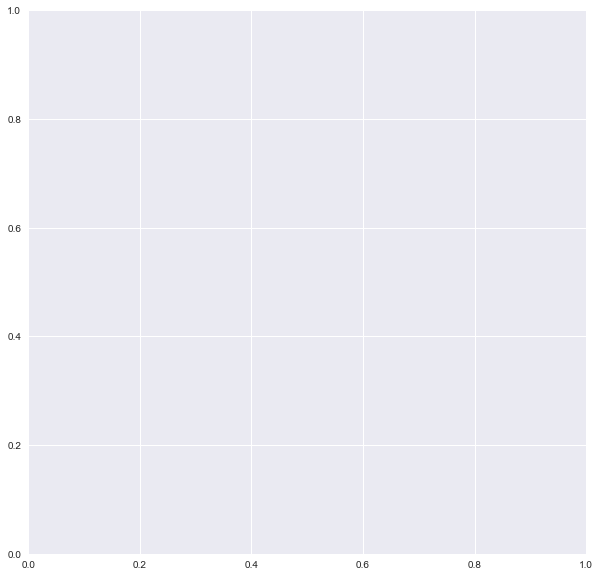

In [60]:
# convert to pandas dataframe
estimator_axis = list(mae_plot.keys())
mae_axis = list(mae_plot.values())

d = {'mae': mae_axis, 'estimator_tune': estimator_axis}
plot_data = pd.DataFrame(d)

# plot with seaborn
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style("darkgrid")
sns.lineplot(y='mae', x='estimator_tune', data=plot_data)
ax.set(xlabel='Estimator tune', ylabel='Mean Absolute Errors')
plt.show()

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)